# Redes Neuronales

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import random
import statsmodels.api as sm
import statsmodels.stats.diagnostic as smd
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split
import seaborn as sns
import statsmodels.api as sm
import scipy.stats as stats
import statsmodels.stats.diagnostic as diag
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neural_network import MLPClassifier

from sklearn.compose import make_column_selector as selector #Para seleccionar de forma automática las variables numéricas y categóricas
from sklearn.preprocessing import OneHotEncoder #Para codificar las variables categóricas usando dummies
from sklearn.preprocessing import StandardScaler #Para normalizar las variables numéricas
from sklearn.compose import ColumnTransformer #Modifica las columnas usando los preprocesadores
from sklearn.pipeline import make_pipeline #Planifica una secuencia de procesos
from sklearn import set_config #Para mostrar graficamente el pipeline
from sklearn.model_selection import GridSearchCV

set_config(display='diagram')
#Metrics
from sklearn.metrics import make_scorer, accuracy_score,precision_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score ,precision_score,recall_score,f1_score, ConfusionMatrixDisplay

#### Lectura de Datos

In [3]:
# Leer los datos
df = pd.read_csv("train.csv")

# Selección de variables
variables_numericas = [
    'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF',
    '1stFlrSF', 'FullBath', 'YearBuilt', 'KitchenAbvGr',
    'TotRmsAbvGrd', 'Fireplaces', 'SalePrice'
]
df = df[variables_numericas]

### Transformaciones Realizadas

##### Clasificación de Precios (Variable categórica)

In [4]:
# Clasificación de precios
p40 = df['SalePrice'].quantile(0.40)
p90 = df['SalePrice'].quantile(0.90)

def clasificar_precio(precio):
    if precio <= p40:
        return "Económica"
    elif precio <= p90:
        return "Intermedia"
    else:
        return "Cara"

In [5]:
df['CategoriaPrecio'] = df['SalePrice'].apply(clasificar_precio)

#### Codificar variable categórica como números

In [6]:
le = LabelEncoder()
df['Clase'] = le.fit_transform(df['CategoriaPrecio'])  # Económica → 0, Intermedia → 1, Cara → 2

#### Estandarización de variables

In [7]:
X = df.drop(columns=['SalePrice', 'CategoriaPrecio', 'Clase'])  # Variables predictoras
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

y = df['Clase']  # Variable objetivo codificada


#### Separación Train y Test

In [8]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.3, random_state=42, stratify=y
)

#### Configuración de modelos

In [9]:
# Modelo 1: topología (8, 4), función activación 'relu'
modelo1 = MLPClassifier(hidden_layer_sizes=(8, 4), activation='relu', max_iter=1000, random_state=42, verbose=True)
modelo1.fit(X_train, y_train)
y_pred1 = modelo1.predict(X_test)


# Modelo 2: topología (6, 6, 4), función activación 'tanh'
modelo2 = MLPClassifier(hidden_layer_sizes=(6, 6, 4), activation='tanh', max_iter=1000, random_state=42, verbose=True)
modelo2.fit(X_train, y_train)
y_pred2 = modelo2.predict(X_test)


Iteration 1, loss = 1.10312515
Iteration 2, loss = 1.06967969
Iteration 3, loss = 1.03949176
Iteration 4, loss = 1.01311778
Iteration 5, loss = 0.98893150
Iteration 6, loss = 0.96694418
Iteration 7, loss = 0.94598561
Iteration 8, loss = 0.92740654
Iteration 9, loss = 0.90794569
Iteration 10, loss = 0.88810811
Iteration 11, loss = 0.86684694
Iteration 12, loss = 0.84433372
Iteration 13, loss = 0.81994434
Iteration 14, loss = 0.79584846
Iteration 15, loss = 0.77244203
Iteration 16, loss = 0.75071925
Iteration 17, loss = 0.72928310
Iteration 18, loss = 0.70988144
Iteration 19, loss = 0.69221386
Iteration 20, loss = 0.67640461
Iteration 21, loss = 0.66238734
Iteration 22, loss = 0.64940450
Iteration 23, loss = 0.63769019
Iteration 24, loss = 0.62657224
Iteration 25, loss = 0.61626307
Iteration 26, loss = 0.60627574
Iteration 27, loss = 0.59672834
Iteration 28, loss = 0.58728672
Iteration 29, loss = 0.57856970
Iteration 30, loss = 0.57014765
Iteration 31, loss = 0.56199857
Iteration 32, los

Modelo 1 (ReLU):
              precision    recall  f1-score   support

           0       0.86      0.86      0.86        43
           1       0.88      0.88      0.88       177
           2       0.87      0.88      0.87       218

    accuracy                           0.87       438
   macro avg       0.87      0.87      0.87       438
weighted avg       0.87      0.87      0.87       438



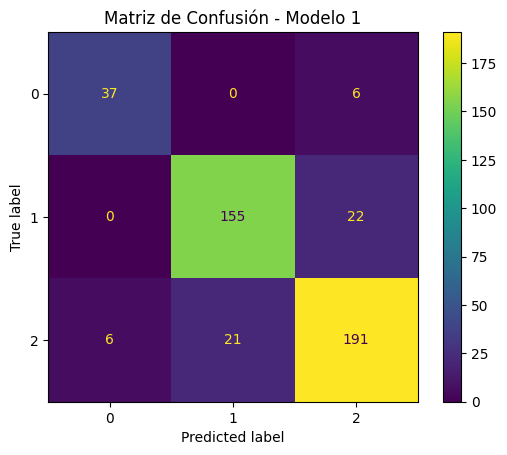

Modelo 2 (tanh):
              precision    recall  f1-score   support

           0       0.81      0.81      0.81        43
           1       0.88      0.85      0.87       177
           2       0.85      0.87      0.86       218

    accuracy                           0.86       438
   macro avg       0.85      0.85      0.85       438
weighted avg       0.86      0.86      0.86       438



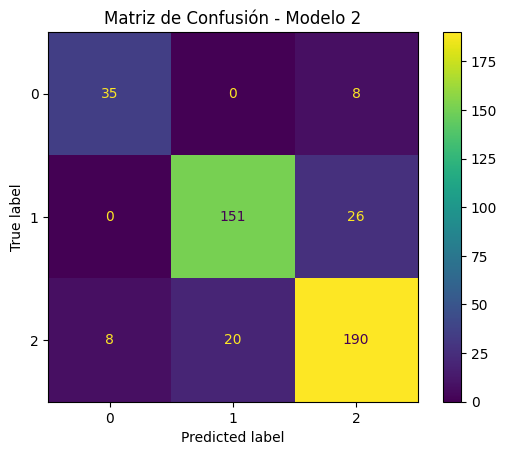

In [10]:
print("Modelo 1 (ReLU):")
print(classification_report(y_test, y_pred1))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred1)
plt.title("Matriz de Confusión - Modelo 1")
plt.show()


print("Modelo 2 (tanh):")
print(classification_report(y_test, y_pred2))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred2)
plt.title("Matriz de Confusión - Modelo 2")
plt.show()